# Hierarchical Bayesian Ranking

- Using the dirichlet distribution for 

# Get the data

## Statcast data

In [1]:
import pandas as pd

In [6]:
# import pybaseball
# from concurrent.futures import ThreadPoolExecutor, as_completed

# date_range = pd.date_range('2018-03-29', pd.datetime.today()).strftime('%Y-%m-%d')
# results = []
# errors = []
# with ThreadPoolExecutor() as executor:
#     futures = {executor.submit(pybaseball.statcast, date): date for date in date_range}
#     for future in as_completed(futures):
#         try:
#             results.append(future.result())
#         except Exception as err:
#             errors.append(err)
#             print(f'could not get data for data {futures[future]}')

could not get data for data 2018-07-16
could not get data for data 2018-07-17
could not get data for data 2018-07-18
could not get data for data 2018-09-20


In [7]:
# df = pd.concat(results)
# df.shape

(676005, 90)

In [8]:
# df.to_csv(f'statcast-{pd.datetime.today().strftime("%Y-%m-%d")}.csv', index=False)

In [2]:
df = pd.read_csv("statcast-2018-09-20.csv")

In [3]:
d = df.groupby([
    'game_date', 'home_team', 'away_team', 
], as_index=False)[['post_away_score', 'post_home_score']].max()

In [4]:
d[(d.home_team == 'PHI') & (d.away_team == 'SF')]

,game_date,home_team,away_team,post_away_score,post_home_score
501,2018-05-07,PHI,SF,0.0,11.0
514,2018-05-08,PHI,SF,2.0,4.0
529,2018-05-09,PHI,SF,3.0,11.0
541,2018-05-10,PHI,SF,3.0,6.0


In [5]:
d.shape

(2249, 5)

In [6]:
team_ids = {team: i for i, team in enumerate(d.home_team.unique())}
n_teams = len(team_ids)
team_ids

{'ARI': 0,
 'ATL': 1,
 'BAL': 2,
 'BOS': 21,
 'CHC': 29,
 'CIN': 13,
 'CLE': 27,
 'COL': 28,
 'CWS': 22,
 'DET': 14,
 'HOU': 15,
 'KC': 3,
 'LAA': 16,
 'LAD': 4,
 'MIA': 5,
 'MIL': 17,
 'MIN': 23,
 'NYM': 6,
 'NYY': 19,
 'OAK': 7,
 'PHI': 24,
 'PIT': 18,
 'SD': 8,
 'SEA': 9,
 'SF': 20,
 'STL': 25,
 'TB': 10,
 'TEX': 11,
 'TOR': 12,
 'WSH': 26}

In [7]:
import numpy as np
d['home_team_id'] = d.home_team.map(team_ids)
d['away_team_id'] = d.away_team.map(team_ids)
d['home_team_win'] = np.where(d.post_home_score > d.post_away_score, 1, 0)
d['away_team_win'] = np.where(d.post_home_score < d.post_away_score, 1, 0)

## Standings

In [8]:
import requests as rq
import pandas as pd
response = rq.get('https://projects.fivethirtyeight.com/2018-mlb-predictions/')
standings = pd.read_html(response.content)[0]

In [9]:
standings

,Unnamed: 0_level_0,Avg. Simulated SeasonAvg. Simulation,Postseason Chances,Unnamed: 3_level_0,Unnamed: 4_level_0,Unnamed: 5_level_0,Unnamed: 6_level_0,Unnamed: 7_level_0,Unnamed: 8_level_0
,Team▲▼,Division▲▼,Team rating▲▼,1-Week Change▲▼,RecordProj.rec.▲▼,Run Diff.▲▼,Make PlayoffsMakePlay-offs▲▼,WinDivisionWinDiv.▲▼,Win World SeriesWinW.S.▲▼
0,Astros95-57Astros,AL West,1595,-6.0,102-60,258,>99%,99%,20%
1,Red Sox103-49Red Sox,AL East,1586,-8.0,109-53,223,✓,>99%,24%
2,Dodgers85-68Dodgers,NL West,1569,11.0,91-71,165,96%,93%,17%
3,Yankees93-58Yankees,AL East,1565,4.0,99-63,173,>99%,<1%,7%
4,Athletics91-61Athletics,AL West,1561,-3.0,97-65,122,99%,1%,4%
5,Indians85-66Indians,AL Central,1556,1.0,91-71,166,✓,✓,9%
6,Rays85-66Rays,AL East,1550,8.0,91-71,84,1%,—,<1%
7,Cubs89-63Cubs,NL Central,1548,3.0,95-67,119,>99%,89%,10%
8,Cardinals84-69Cardinals,NL Central,1541,-2.0,89-73,79,75%,<1%,3%


In [10]:
team_name_map = {
    'Diamondbacks': 'ARI',
    'Braves': 'ATL',
    'Orioles': 'BAL',
    'Red Sox': 'BOS',
    'Angels': 'LAA',
    'Cubs': 'CHC',
    'White Sox': 'CWS',
    'Reds': 'CIN',
    'Indians': 'CLE',
    'Rockies': 'COL',
    'Tigers': 'DET',
    'Astros': 'HOU',
    'Royals': 'KC',
    'Dodgers': 'LAD',
    'Marlins': 'MIA',
    'Brewers': 'MIL',
    'Twins': 'MIN',
    'Yankees': 'NYY',
    'Athletics': 'OAK',
    'Phillies': 'PHI',
    'Pirates': 'PIT',
    'Padres': 'SD',
    'Mariners': 'SEA',
    'Giants': 'SF',
    'Cardinals': 'STL',
    'Rays': 'TB',
    'Rangers': 'TEX',
    'Blue Jays': 'TOR',
    'Nationals': 'WSH',
    'Mets': 'NYM',
}

In [11]:
def sanitize_name(n):
    out = ''
    for a in n:
        if a.isdigit():
            break
        out += a
    return out
rankings = standings.iloc[:,0].apply(sanitize_name).map(team_name_map)

In [12]:
import numpy as np
rankings = pd.DataFrame({
    'team': rankings,
    'team_id': rankings.map(team_ids),
    'score': np.arange(len(rankings))[::-1]
})

In [13]:
rankings

,team,team_id,score
0,HOU,15,29
1,BOS,21,28
2,LAD,4,27
3,NYY,19,26
4,OAK,7,25
5,CLE,27,24
6,TB,10,23
7,CHC,29,22
8,STL,25,21
9,MIL,17,20


In [14]:
assert not rankings.team.isnull().any()
assert not rankings.team_id.isnull().any()

In [15]:
# center at 10 - negative values restrict how we can model the problem
rankings['score'] = 10 + (rankings['score'] - np.mean(rankings['score'])) / np.std(rankings['score'])

In [16]:
rankings

,team,team_id,score
0,HOU,15,11.675247
1,BOS,21,11.559712
2,LAD,4,11.444178
3,NYY,19,11.328644
4,OAK,7,11.213110
5,CLE,27,11.097575
6,TB,10,10.982041
7,CHC,29,10.866507
8,STL,25,10.750973
9,MIL,17,10.635438


## Aggregate

In [17]:
dd = d.groupby(['home_team', 'home_team_id', 'away_team', 'away_team_id'], as_index=False)[['home_team_win', 'away_team_win']].sum()
dd['total_games'] = dd.home_team_win + dd.away_team_win
dd.head()

,home_team,home_team_id,away_team,away_team_id,home_team_win,away_team_win,total_games
0,ARI,0,ATL,1,1,3,4
1,ARI,0,CHC,29,1,2,3
2,ARI,0,CIN,13,2,1,3
3,ARI,0,COL,28,3,3,6
4,ARI,0,HOU,15,1,1,2


# Model

## With prior rankings and other params

- scale inputs to dirichlet - that way there is no need to worry about negative support for params
- model binomial outcome across all series

In [27]:
import theano.tensor as T
import pymc3 as pm

n_teams = len(team_ids)
n_games = len(dd)
n_matchups = np.array([dd.total_games, dd.total_games]).T
team_rankings = {r.team_id: r.score for _, r in rankings.iterrows()}
# convert to array for convenient indexing
team_rankings_arr = np.array([team_rankings[id_] for id_ in team_ids.values()])
home_team_id = dd.home_team_id
away_team_id = dd.away_team_id
observed_wins = dd[['home_team_win']]


def sigmoid(a):
    diff = a[:, 0] - a[:, 1]
    return 1 / (1 - T.exp(diff))

with pm.Model() as model:
    b = pm.HalfNormal('b', 1)
    team_abilities_sigma = pm.Uniform('team_abilities_sigma', 0, 2)
    team_abilities = pm.Normal('team_abilities', b*team_rankings_arr, team_abilities_sigma, shape=n_teams)
    home_field_advantage = pm.Normal('home_field_advantage', 0, 1, shape=n_teams)
    home_team_ability = team_abilities[home_team_id] + home_field_advantage[home_team_id]
    away_team_ability = team_abilities[away_team_id]

    matchups = T.stack([home_team_ability, away_team_ability])
    prob_winners = pm.Deterministic('prob_winners', sigmoid(matchups))
    p = pm.Binomial('p', n=n_matchups, p=prob_winners, shape=n_games, observed=observed_wins)

    trace = pm.sample(10_000, model=model)

/Users/dgates/venvs/py3/lib/python3.6/site-packages/theano/tensor/subtensor.py:2190: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/Users/dgates/venvs/py3/lib/python3.6/site-packages/theano/tensor/subtensor.py:2190: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [home_field_advantage, team_abilities, team_abilities_sigma, b]
/Users/dgat

RuntimeError: Chain 0 failed.

In [25]:
pm.summary(trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
team_abilities__0,6.627827,1.788758,0.060932,3.496771,10.234919,640.775150,1.000111
team_abilities__1,6.487435,1.700545,0.058032,3.613824,10.019657,635.391682,1.000171
team_abilities__2,2.317715,0.803350,0.025042,0.937216,3.913616,755.871670,1.000188
team_abilities__3,2.859191,0.912900,0.028999,1.317026,4.711839,740.562341,1.000403
team_abilities__4,7.378108,1.984168,0.067846,4.022374,11.441193,637.618066,1.000246
team_abilities__5,3.878526,1.200703,0.039541,1.777027,6.256992,689.571823,1.000346
team_abilities__6,5.515388,1.452931,0.048439,3.007426,8.442004,665.048465,1.000181
team_abilities__7,7.360633,2.043376,0.069683,3.852683,11.543035,636.550665,1.000106
team_abilities__8,4.719669,1.245181,0.041185,2.583448,7.299469,680.173866,1.000061
team_abilities__9,6.603152,1.806502,0.061398,3.449794,10.224203,642.319939,1.000117


/Users/dgates/venvs/py3/lib/python3.6/site-packages/theano/tensor/subtensor.py:2190: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x141bb4710>,
      dtype=object)

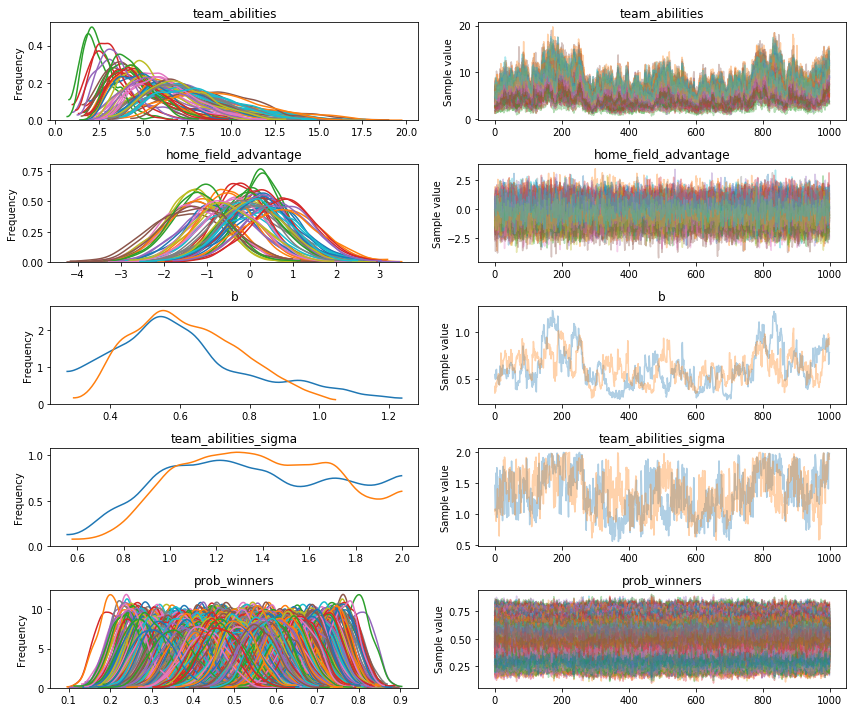

In [26]:
pm.plots.traceplot(trace[-1000:])

In [27]:
estimated_abilities = trace['team_abilities'][-1000:].mean(axis=0)
estimated_abilities_error = trace['team_abilities'][-1000:].std(axis=0)

In [28]:
team_id_lookup = {v: k for k, v in team_ids.items()}

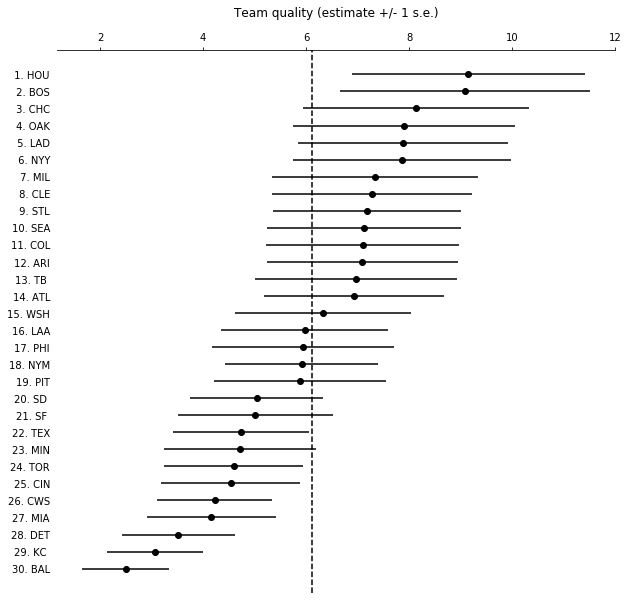

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

center_line = np.mean(estimated_abilities)

values = list(reversed(estimated_abilities))
labels = list(reversed([team_id_lookup[i] for i in range(n_teams)]))
errors = list(reversed(estimated_abilities_error))

tmp = sorted(zip(values, labels, errors), key=lambda x: x[0])
values, labels, errors = zip(*tmp)
labels = [f'{n_teams-i:2}. {L:3}' for i, L in enumerate(labels)]

fig, ax = plt.subplots(figsize=(10, 10))

# remove borders
sns.despine(left=True, bottom=True, top=False)

# plot error bars
ax.errorbar(values, range(len(labels)), xerr=errors, fmt='o', color='k')

# label the y-adxis
plt.yticks(np.arange(len(labels)))
locs, _ = plt.yticks()
plt.yticks(locs, labels)
plt.tick_params(axis='y', which='both', left=False)

# give it a reference line
ax.axvline(center_line, linestyle='--', color='k')

# Move x axis to top
ax.xaxis.tick_top()

# polish it off with a title
_ = ax.set_title('Team quality (estimate +/- 1 s.e.)', y=1.05)

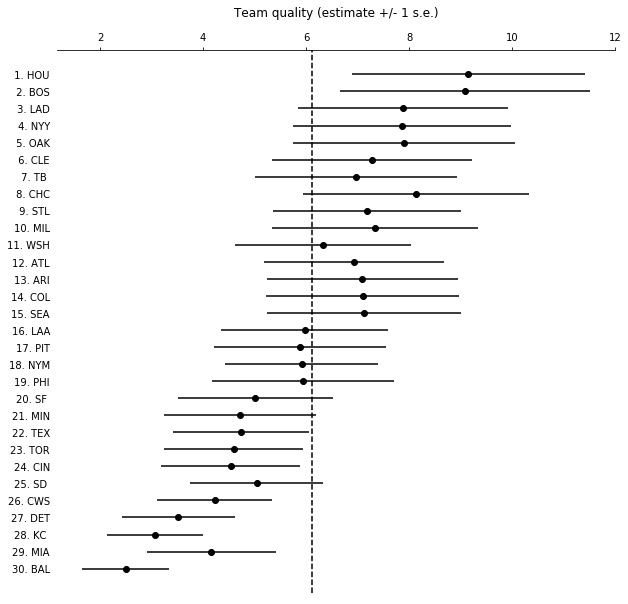

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

center_line = np.mean(estimated_abilities)
values = list(reversed(estimated_abilities))
labels = list(reversed([team_id_lookup[i] for i in range(n_teams)]))
errors = list(reversed(estimated_abilities_error))

tmp = sorted(zip(values, labels, errors), key=lambda x: rankings.set_index('team').loc[x[1], 'score'])
values, labels, errors = zip(*tmp)
labels = [f'{n_teams-i:2}. {L:3}' for i, L in enumerate(labels)]

fig, ax = plt.subplots(figsize=(10, 10))

# remove borders
sns.despine(left=True, bottom=True, top=False)

# plot error bars
ax.errorbar(values, range(len(labels)), xerr=errors, fmt='o', color='k')

# label the y-adxis
plt.yticks(np.arange(len(labels)))
locs, _ = plt.yticks()
plt.yticks(locs, labels)
plt.tick_params(axis='y', which='both', left=False)

# give it a reference line
ax.axvline(center_line, linestyle='--', color='k')

# Move x axis to top
ax.xaxis.tick_top()

# polish it off with a title
_ = ax.set_title('Team quality (estimate +/- 1 s.e.)', y=1.05)

# Simulate Outcomes

In [31]:
n = 10_000

def simulate_outcome(team1, team2):
    id1, id2 = team_ids[team1], team_ids[team2]
    advantage = trace['home_field_advantage'][:,id1].T
    trace1, trace2 = trace['team_abilities'][:, [id1, id2]].T
    sim1, sim2 = np.random.choice(trace1, size=n) + np.random.choice(advantage, size=n), np.random.choice(trace2, size=n)
    denom = sim1 + sim2
    p1, p2 = sim1 / denom, sim2 / denom
    p_home = (p1 > p2).sum() / len(p1)
    return p_home, 1-p_home

In [32]:
simulate_outcome('BOS', 'BAL')

(0.9991, 0.0009000000000000119)

In [33]:
simulate_outcome('BAL', 'BOS')

(0.0027, 0.9973)

In [34]:
simulate_outcome('PHI', 'NYM')

(0.5988, 0.4012)

In [35]:
simulate_outcome('NYM', 'PHI')

(0.297, 0.7030000000000001)

In [36]:
simulate_outcome('PHI', 'BOS')

(0.211, 0.789)

In [37]:
simulate_outcome('BOS', 'PHI')

(0.8951, 0.1049)

## Evaluate

In [38]:
posterior_p = pm.sample_ppc(trace[-1000:], model=model)['p']

/Users/dgates/venvs/py3/lib/python3.6/site-packages/theano/tensor/subtensor.py:2190: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
100%|██████████| 1000/1000 [00:00<00:00, 1057.38it/s]


In [39]:
posterior_p.shape

(1000, 529, 2)

In [40]:
p = .95
tail_lower = (1-p) / 2
tail_upper = 1 - tail_lower
lower_bounds = np.quantile(posterior_p, tail_lower, axis=0)
upper_bounds = np.quantile(posterior_p, tail_upper, axis=0)

In [41]:
dd['home_team_lower_bound'] = lower_bounds[:,0]
dd['away_team_lower_bound'] = lower_bounds[:,1]
dd['home_team_upper_bound'] = upper_bounds[:,0]
dd['away_team_upper_bound'] = upper_bounds[:,1]

In [42]:
dd.home_team_win.between(dd.home_team_lower_bound, dd.home_team_upper_bound).sum() / len(dd)

0.996219281663516

In [43]:
d_eval = dd.loc[(dd.home_team == 'PHI') | (dd.away_team == 'PHI')]
d_eval['is_home'] = d_eval.home_team == 'PHI'
labels = d_eval.apply(lambda x: f'{x.away_team} at {x.home_team} ({x.total_games} games total)', axis=1)

/Users/dgates/venvs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


NameError: name 'is_home' is not defined

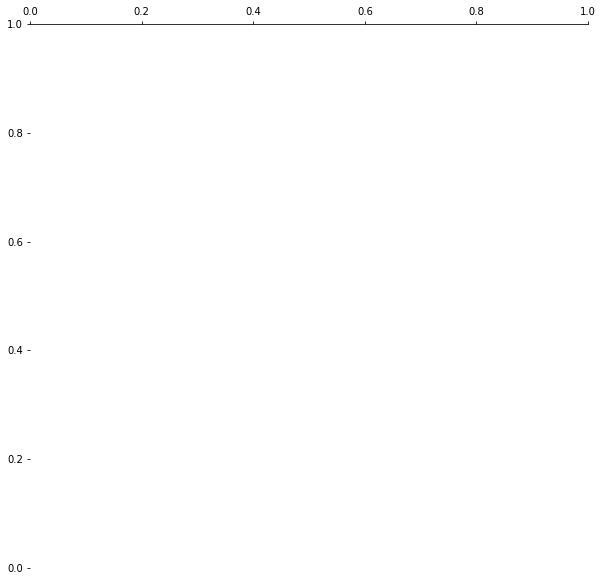

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 10))

# remove borders
sns.despine(left=True, bottom=True, top=False)

# plot actual outcome
wins = np.where(is_home, d_eval.home_team_win, d_eval.away_team_win)
ax.scatter(wins, range(len(labels)), color='k')

# plot error bars
for idx, (_, rec) in enumerate(d_eval.iterrows()):
    if rec.is_home:
        low, high = rec.home_team_lower_bound, rec.home_team_upper_bound
    else:
        low, high = rec.away_team_lower_bound, rec.away_team_upper_bound
    ax.plot([low, high], [idx, idx], color='k')

# label the y-adxis
plt.yticks(np.arange(len(labels)))
locs, _ = plt.yticks()
plt.yticks(locs, labels)
plt.tick_params(axis='y', which='both', left=False)

# Move x axis to top
ax.xaxis.tick_top()

# polish it off with a title
_ = ax.set_title('Home team wins compared to 75% predictive interval', y=1.05)

plt.tight_layout()